In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1.创建等差数列的数据集
plot_x = np.linspace(-1,6,141)

In [3]:
# 2.根据某个函数创建数据集 y
plot_y = (plot_x -2.5)**2 -1

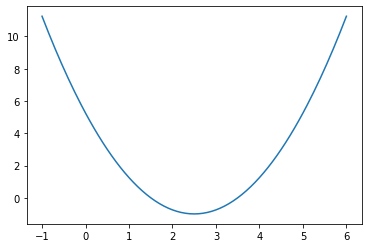

In [4]:
# 画出函数图像
plt.plot(plot_x, plot_y)

In [5]:
# 3.df 方法求导
def dJ(theta):
    return 2*(theta-2.5)

In [6]:
# 4.求函数值
def J(theta):
    return (theta -2.5)**2 -1

In [7]:
# 5.确定 eta,epsilon 即步长和差值精度最小值
eta = 0.1
epsilon = 1e-8

In [8]:
# 最简单的梯度下降法
theta = 0.0
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta*gradient
    if(np.absolute(J(theta)-J(last_theta))<epsilon):
        break      
        
print(theta)
print(J(theta))
    

2.499891109642585
-0.99999998814289


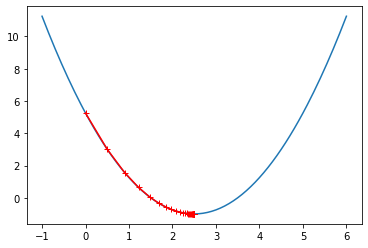

In [9]:
# 将梯度下降过程中经过的 x 的值放在 hstory_x 中
theta = 0.0
history_theta = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta*gradient
    history_theta.append(theta)
    if(np.absolute(J(theta)-J(last_theta))<epsilon):
        break      
        
#将走过的路径绘制成图像
plt.plot(plot_x, plot_y)
plt.plot(np.array(history_theta), J(np.array(history_theta)), color="r", marker='+')

In [10]:
# 将上面的代码封装在一个函数之中
# 1.得到走过的路径的方法
theta_history = []

def gradient_descent(initial_theta, eta, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)

    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
    
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
# 2.绘制图像的方法            
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker='+')
    plt.show() 

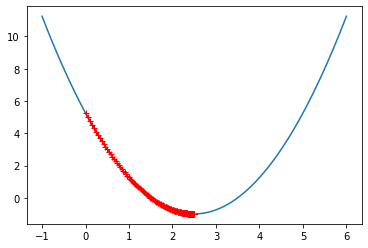

In [11]:
# 调用函数
eta = 0.01
initial_theta = 0.0
gradient_descent(initial_theta,eta)
plot_theta_history()

In [12]:
len(theta_history)

424

### eta 选择的不合适
如果 eta 选择的不合适，只会造成 theta 所对应的 J 值越来越来，直到超过所能表示的最大范围，然后报错。
解决：首先在J计算里添加一个 try catch 语句，如果数值超过最大表示的值就报错
其次在 while 循环中添加循环次数，不能无止境的大下去

In [14]:
def J(theta):
    try:
        return (theta-2.5)**2 - 1.
    except:
        return float('inf')

In [19]:
# 将上面的代码封装在一个函数之中
# 1.得到走过的路径的方法
theta_history = []

def gradient_descent(initial_theta, eta,n_iters = 10, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    iters = 0;

    while iters<n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
    
        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
        iters +=1
# 2.绘制图像的方法            
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker='+')
    plt.show() 

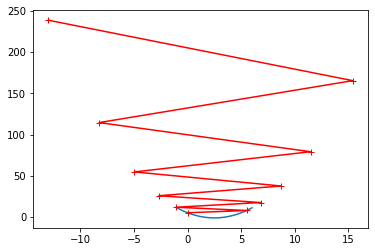

In [20]:
# 调用函数
eta = 1.1
initial_theta = 0.0
gradient_descent(initial_theta,eta)
plot_theta_history()